In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Reading the data, Adding column names to it, and merging it as one

In [ ]:
df1 = pd.read_csv('/content/train.csv', encoding='ISO-8859-1')
df2 = pd.read_csv('/content/test.csv', encoding='ISO-8859-1')
df3 = pd.read_csv('/content/valid.csv', encoding='ISO-8859-1')

print(df2.shape)
print(df3.shape)
df1.columns = ['id', 'label', 'statement', 'subject', 'speaker', 'JobTitle', 'State', 'Party', 'BTC', 'FC', 'HT', 'MT', 'POF', 'context']
df2.columns = ['id', 'label', 'statement', 'subject', 'speaker', 'JobTitle', 'State', 'Party', 'BTC', 'FC', 'HT', 'MT', 'POF', 'context']
df3.columns = ['id', 'label', 'statement', 'subject', 'speaker', 'JobTitle', 'State', 'Party', 'BTC', 'FC', 'HT', 'MT', 'POF', 'context']
df = pd.concat([df1, df2, df3], axis=0)
print(df.shape)
df.head()

(1412, 14)
(1443, 14)
(14128, 14)


,id,label,statement,subject,speaker,JobTitle,State,Party,BTC,FC,HT,MT,POF,context
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
2,1123.json,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
3,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
4,12465.json,TRUE,The Chicago Bears have had more starting quart...,education,robin-vos,Wisconsin Assembly speaker,Wisconsin,republican,0.0,3.0,2.0,5.0,1.0,a an online opinion-piece


      id  label  speaker  JobTitle  State  Party   BTC    FC     HT     MT  \
0  10540      3     2827       991     70      6   0.0   0.0    1.0    1.0   
1    324      4      210       733     20      6  70.0  71.0  160.0  163.0   
2   1123      0      309      1355     85     17   7.0  19.0    3.0    5.0   
3   9028      3      486      1355     13      6  15.0   9.0   20.0   19.0   
4  12465      1     2699      1118     80     20   0.0   3.0    2.0    5.0   

    POF                    context  
0   0.0            a floor speech.  
1   9.0                     Denver  
2  44.0             a news release  
3   2.0        an interview on CNN  
4   1.0  a an online opinion-piece  


<ipython-input-75-4c313d4b5b34>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_copy.corr()


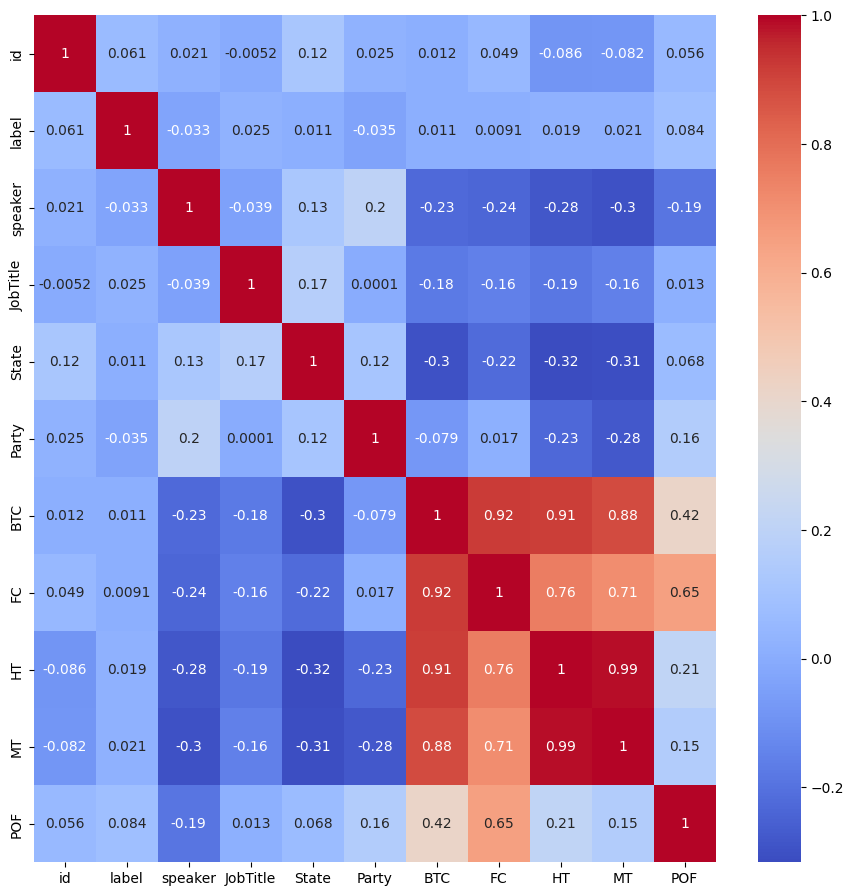

In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
df_copy=df.copy()
df_copy.drop(['statement','subject'],axis=1,inplace=True)
df_copy['id'] = df_copy['id'].apply(lambda x: x[:-5])
df_copy['id'] = df_copy['id'].astype('int64')
le = LabelEncoder()
df_copy['label'] = le.fit_transform(df_copy['label'])
df_copy['speaker'] = le.fit_transform(df_copy['speaker'])
df_copy['JobTitle'] = le.fit_transform(df_copy['JobTitle'])
df_copy['State'] = le.fit_transform(df_copy['State'])
df_copy['Party'] = le.fit_transform(df_copy['Party'])
print(df_copy.head())
corr_matrix = df_copy.corr()
plt.figure(figsize=(11,11))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

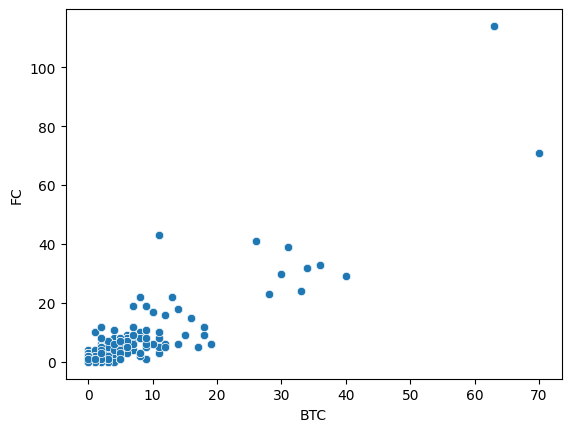

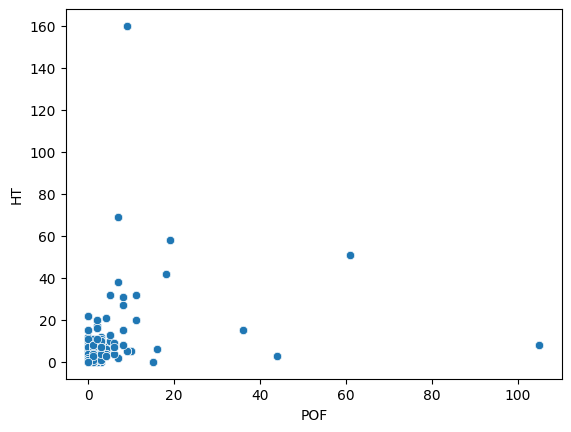

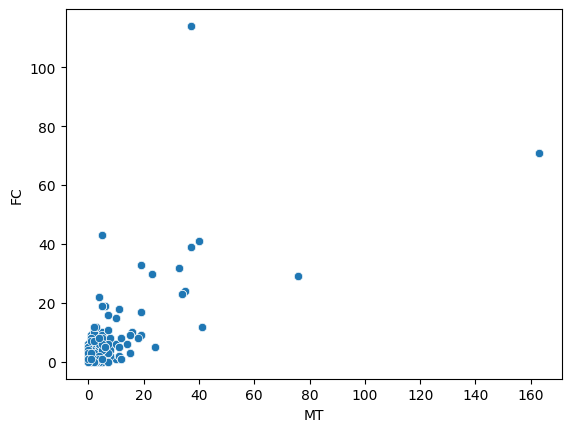

In [ ]:
sns.scatterplot(x='BTC',y='FC',data=df_copy)
plt.show()
sns.scatterplot(x='POF',y='HT',data=df_copy)
plt.show()
sns.scatterplot(x='MT',y='FC',data=df_copy)
plt.show()

Dropping non-required columns

In [ ]:
df = df.drop(['id', 'JobTitle', 'State', 'BTC', 'FC', 'HT', 'MT', 'POF', 'context'], axis=1)
df.head()

,label,statement,subject,speaker,Party
0,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,democrat
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,democrat
2,FALSE,Health care reform legislation is likely to ma...,health-care,blog-posting,none
3,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,democrat
4,TRUE,The Chicago Bears have had more starting quart...,education,robin-vos,republican


Converting data into binary classification

In [ ]:
df['label'] = df['label'].map({'true': 1, 'half-true': 1, 'mostly-true': 1, 'false': 0, 'pants-fire': 0, 'barely-true': 0})
df.head()

,label,statement,subject,speaker,Party
0,1.0,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,democrat
1,1.0,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,democrat
2,NaN,Health care reform legislation is likely to ma...,health-care,blog-posting,none
3,1.0,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,democrat
4,NaN,The Chicago Bears have had more starting quart...,education,robin-vos,republican


Merge the statement and subject columns into one column for analysis

In [ ]:
df['text'] = df['subject'] + ' ' + df['statement']
df = df.drop(['subject', 'statement'], axis=1)
df.head()

,label,speaker,Party,text
0,1.0,scott-surovell,democrat,"energy,history,job-accomplishments When did th..."
1,1.0,barack-obama,democrat,foreign-policy Hillary Clinton agrees with Joh...
2,NaN,blog-posting,none,health-care Health care reform legislation is ...
3,1.0,charlie-crist,democrat,"economy,jobs The economic turnaround started a..."
4,NaN,robin-vos,republican,education The Chicago Bears have had more star...


Dropping missing values rows

In [ ]:
print("Number of missing values in each column:")
print(df.isnull().sum())
print("We drop the missing values")
df = df.dropna()
print("The shape of the dataset is now: ", df.shape)

Number of missing values in each column:
label      5047
speaker       2
Party         2
text          2
dtype: int64
We drop the missing values
The shape of the dataset is now:  (9081, 4)


Converting data into lowercase

In [ ]:
df = df.apply(lambda x: x.astype(str).str.lower())
print(df.head())

  label                 speaker       Party  \
0   1.0          scott-surovell    democrat   
1   1.0            barack-obama    democrat   
3   1.0           charlie-crist    democrat   
5   0.0  republican-party-texas  republican   
6   1.0            barack-obama    democrat   

                                                text  
0  energy,history,job-accomplishments when did th...  
1  foreign-policy hillary clinton agrees with joh...  
3  economy,jobs the economic turnaround started a...  
5  candidates-biography jim dunnam has not lived ...  
6  ethics i'm the only person on this stage who h...  


Removing punctuations except comma, any links and any extra white spaces

In [ ]:
df['text'] = df['text'].str.replace('[^\w\s,]', '')
df['text'] = df['text'].str.replace('http\S+|www.\S+', '', case=False)
df['text'] = df['text'].str.replace(' ,', ',')
df['text'] = df['text'].str.replace(', ', ',')

<ipython-input-82-fca5e7e659c5>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('[^\w\s,]', '')
<ipython-input-82-fca5e7e659c5>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text'] = df['text'].str.replace('http\S+|www.\S+', '', case=False)


In [ ]:
print(df.head())

  label                 speaker       Party  \
0   1.0          scott-surovell    democrat   
1   1.0            barack-obama    democrat   
3   1.0           charlie-crist    democrat   
5   0.0  republican-party-texas  republican   
6   1.0            barack-obama    democrat   

                                                text  
0  energy,history,jobaccomplishments when did the...  
1  foreignpolicy hillary clinton agrees with john...  
3  economy,jobs the economic turnaround started a...  
5  candidatesbiography jim dunnam has not lived i...  
6  ethics im the only person on this stage who ha...  


Tokenization of text column

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
df['text'] = df['text'].apply(lambda x: tokenizer.tokenize(x))
print(df.head())

  label                 speaker       Party  \
0   1.0          scott-surovell    democrat   
1   1.0            barack-obama    democrat   
3   1.0           charlie-crist    democrat   
5   0.0  republican-party-texas  republican   
6   1.0            barack-obama    democrat   

                                                text  
0  [energy, history, jobaccomplishments, when, di...  
1  [foreignpolicy, hillary, clinton, agrees, with...  
3  [economy, jobs, the, economic, turnaround, sta...  
5  [candidatesbiography, jim, dunnam, has, not, l...  
6  [ethics, im, the, only, person, on, this, stag...  


Lemmatization of text column

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
df['text'] = df['text'].apply(lambda x: [lemmatizer.lemmatize(y) for y in x])
print(df.head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


  label                 speaker       Party  \
0   1.0          scott-surovell    democrat   
1   1.0            barack-obama    democrat   
3   1.0           charlie-crist    democrat   
5   0.0  republican-party-texas  republican   
6   1.0            barack-obama    democrat   

                                                text  
0  [energy, history, jobaccomplishments, when, di...  
1  [foreignpolicy, hillary, clinton, agrees, with...  
3  [economy, job, the, economic, turnaround, star...  
5  [candidatesbiography, jim, dunnam, ha, not, li...  
6  [ethic, im, the, only, person, on, this, stage...  


Stop Words removal from text column

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: [item for item in x if item not in stop])
print(df.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


  label                 speaker       Party  \
0   1.0          scott-surovell    democrat   
1   1.0            barack-obama    democrat   
3   1.0           charlie-crist    democrat   
5   0.0  republican-party-texas  republican   
6   1.0            barack-obama    democrat   

                                                text  
0  [energy, history, jobaccomplishments, decline,...  
1  [foreignpolicy, hillary, clinton, agrees, john...  
3  [economy, job, economic, turnaround, started, ...  
5  [candidatesbiography, jim, dunnam, ha, lived, ...  
6  [ethic, im, person, stage, ha, worked, activel...  


Joining text column into a string for vectorization

In [ ]:
df['text'] = df['text'].apply(lambda x: ' '.join(x))

Visualization of data

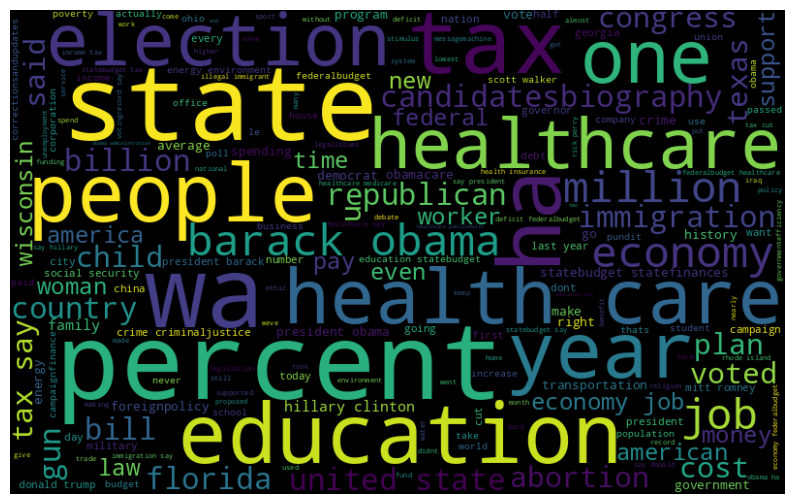

In [ ]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in df['text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Using TFIDF and BOW for vectorization

In [ ]:
def to_vector_Tfidf(df, col):
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(max_features=2000)
    vectorizer.fit(df[col])
    return vectorizer.transform(df[col])

def to_vector_bow(df, col):
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer(max_features=2000)
    vectorizer.fit(df[col])
    return vectorizer.transform(df[col])

In [ ]:
text_vector_tfidf = to_vector_Tfidf(df, 'text')
print("Shape of the tfidf vector: ", text_vector_tfidf.shape)
print(text_vector_tfidf.shape)
text_vector_bow = to_vector_bow(df, 'text')
print("Shape of the text vector for bow vectorization: ", text_vector_bow.shape)
print(text_vector_bow.shape)

Shape of the tfidf vector:  (9081, 2000)
(9081, 2000)
Shape of the text vector for bow vectorization:  (9081, 2000)
(9081, 2000)


In [ ]:
text_vector_tfidf = text_vector_tfidf.toarray()
text_vector_bow = text_vector_bow.toarray()

In [ ]:
label_vector = df['label'].values
speaker_vector = df['speaker'].values
party_vector = df['Party'].values
label_vector = label_vector.reshape(-1, 1)
speaker_vector = speaker_vector.reshape(-1, 1)
party_vector = party_vector.reshape(-1, 1)

In [ ]:
dataF3 = np.concatenate((text_vector_tfidf, label_vector, speaker_vector, party_vector), axis=1)
dataF4 = np.concatenate((text_vector_bow, label_vector, speaker_vector, party_vector), axis=1)
print(dataF3.shape)
print(dataF4.shape)

(9081, 2003)
(9081, 2003)


In [ ]:
dataF3=pd.DataFrame(dataF3)
dataF4=pd.DataFrame(dataF4)
print(dataF3.head())

  0    1    2    3    4    5    6    7    8    9     ... 1993 1994 1995 1996  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

  1997 1998 1999 2000                    2001        2002  
0  0.0  0.0  0.0  1.0          scott-surovell    democrat  
1  0.0  0.0  0.0  1.0            barack-obama    democrat  
2  0.0  0.0  0.0  1.0           charlie-crist    democrat  
3  0.0  0.0  0.0  0.0  republican-party-texas  republican  
4  0.0  0.0  0.0  1.0            barack-obama    democrat  

[5 rows x 2003 columns]


In [ ]:
for i in range(2000):
    dataF3.rename(columns={i: 'tfidf'+str(i)}, inplace=True)
    dataF4.rename(columns={i: 'bow'+str(i)}, inplace=True)
dataF3.rename(columns={2000: 'label'}, inplace=True)
dataF4.rename(columns={2000: 'label'}, inplace=True)
dataF3.rename(columns={2001: 'speaker'}, inplace=True)
dataF4.rename(columns={2001: 'speaker'}, inplace=True)
dataF3.rename(columns={2002: 'party'}, inplace=True)
dataF4.rename(columns={2002: 'party'}, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le3=LabelEncoder()
le4=LabelEncoder()
dataF3['speaker']=le3.fit_transform(dataF3['speaker'])
dataF4['speaker']=le4.fit_transform(dataF4['speaker'])
dataF3['party']=le3.fit_transform(dataF3['party'])
dataF4['party']=le4.fit_transform(dataF4['party'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train3, X_test3, y_train3, y_test3 = train_test_split(dataF3.drop('label', axis=1), dataF3['label'], test_size=0.2, random_state=0)
X_val3, X_test3, y_val3, y_test3 = train_test_split(X_test3, y_test3, test_size=0.5, random_state=0)
X_train4, X_test4, y_train4, y_test4 = train_test_split(dataF4.drop('label', axis=1), dataF4['label'], test_size=0.2, random_state=0)
X_val4, X_test4, y_val4, y_test4 = train_test_split(X_test4, y_test4, test_size=0.5, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
print(dataF3.head())
print(dataF4.head())

  tfidf0 tfidf1 tfidf2 tfidf3 tfidf4 tfidf5 tfidf6 tfidf7 tfidf8 tfidf9  ...  \
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
2    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
3    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   
4    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  ...   

  tfidf1993 tfidf1994 tfidf1995 tfidf1996 tfidf1997 tfidf1998 tfidf1999 label  \
0       0.0       0.0       0.0       0.0       0.0       0.0       0.0   1.0   
1       0.0       0.0       0.0       0.0       0.0       0.0       0.0   1.0   
2       0.0       0.0       0.0       0.0       0.0       0.0       0.0   1.0   
3       0.0       0.0       0.0       0.0       0.0       0.0       0.0   0.0   
4       0.0       0.0       0.0       0.0       0.0       0.0       0.0   1.0   

  speaker party  
0    2111     

# grid search and learning curves

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
def gauss_grid_learn(X_train,y_train,X_val,y_val):
    gnb=GaussianNB()
    param_grid = {'var_smoothing': np.logspace(0,-9, num=10)}
    grid_search = GridSearchCV(gnb, param_grid, cv=3,refit=True,n_jobs=-1,scoring='accuracy',verbose=1)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("Accuracy: ",accuracy_score(y_val,grid_search.predict(X_val)))
    print(classification_report(y_val,grid_search.predict(X_val)))
    train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, verbose=1,shuffle=True)
    train_mean=np.mean(train_scores,axis=1)
    train_std=np.std(train_scores,axis=1)
    test_mean=np.mean(test_scores,axis=1)
    test_std=np.std(test_scores,axis=1)
    plt.plot(train_sizes,train_mean,color='blue',marker='o',label='training accuracy')
    plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',label='validation accuracy')
    plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
    plt.title("Learning Curve for Gaussian Naive Bayes")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc='best')
    plt.show()

def logistic_grid_learn(X_train,y_train,X_val,y_val):
    logreg=LogisticRegression(random_state=0,max_iter=20000)
    param_grid = {'C': [0.1, 1, 10],'tol': [0.0001, 0.001, 1, 10]}
    grid_search = GridSearchCV(logreg, param_grid, cv=3,refit=True,n_jobs=-1,scoring='accuracy',verbose=1)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("Accuracy: ",accuracy_score(y_val,grid_search.predict(X_val)))
    print(classification_report(y_val,grid_search.predict(X_val)))
    train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, verbose=1,shuffle=True)
    train_mean=np.mean(train_scores,axis=1)
    train_std=np.std(train_scores,axis=1)
    test_mean=np.mean(test_scores,axis=1)
    test_std=np.std(test_scores,axis=1)
    plt.plot(train_sizes,train_mean,color='blue',marker='o',label='training accuracy')
    plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',label='validation accuracy')
    plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
    plt.title("Learning Curve for Logistic Regression")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc='best')
    plt.show()

def random_grid_learn(X_train,y_train,X_val,y_val):
    rtree=RandomForestClassifier(random_state=0)
    param_grid = {'max_depth': [10,50, 100, None],'criterion': ['gini', 'entropy']}
    grid_search = GridSearchCV(rtree, param_grid, cv=3,refit=True,n_jobs=-1,scoring='accuracy',verbose=1)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("Accuracy: ",accuracy_score(y_val,grid_search.predict(X_val)))
    print(classification_report(y_val,grid_search.predict(X_val)))
    train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, verbose=1,shuffle=True)
    train_mean=np.mean(train_scores,axis=1)
    train_std=np.std(train_scores,axis=1)
    test_mean=np.mean(test_scores,axis=1)
    test_std=np.std(test_scores,axis=1)
    plt.plot(train_sizes,train_mean,color='blue',marker='o',label='training accuracy')
    plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',label='validation accuracy')
    plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
    plt.title("Learning Curve for Random Forest")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc='best')
    plt.show()

def svm_grid_learn(X_train,y_train,X_val,y_val):
    svm=SVC(random_state=0)
    param_grid={'C':[0.1,1,100],'kernel':['rbf','linear']}
    grid_search = GridSearchCV(svm, param_grid, cv=3,refit=True,n_jobs=-1,scoring='accuracy',verbose=1)
    grid_search.fit(X_train,y_train)
    print(grid_search.best_params_)
    print(grid_search.best_score_)
    print("Accuracy: ",accuracy_score(y_val,grid_search.predict(X_val)))
    print(classification_report(y_val,grid_search.predict(X_val)))
    train_sizes, train_scores, test_scores = learning_curve(grid_search.best_estimator_, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, verbose=1,shuffle=True)
    train_mean=np.mean(train_scores,axis=1)
    train_std=np.std(train_scores,axis=1)
    test_mean=np.mean(test_scores,axis=1)
    test_std=np.std(test_scores,axis=1)
    plt.plot(train_sizes,train_mean,color='blue',marker='o',label='training accuracy')
    plt.fill_between(train_sizes,train_mean+train_std,train_mean-train_std,alpha=0.15,color='blue')
    plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',label='validation accuracy')
    plt.fill_between(train_sizes,test_mean+test_std,test_mean-test_std,alpha=0.15,color='green')
    plt.title("Learning Curve for SVM")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.legend(loc='best')
    plt.show()




Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'var_smoothing': 1e-08}
0.6353255013675755
Accuracy:  0.6222466960352423
              precision    recall  f1-score   support

         0.0       0.49      0.47      0.48       339
         1.0       0.69      0.72      0.70       569

    accuracy                           0.62       908
   macro avg       0.59      0.59      0.59       908
weighted avg       0.62      0.62      0.62       908

[learning_curve] Training set sizes: [ 484 1573 2663 3752 4842]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.6min finished


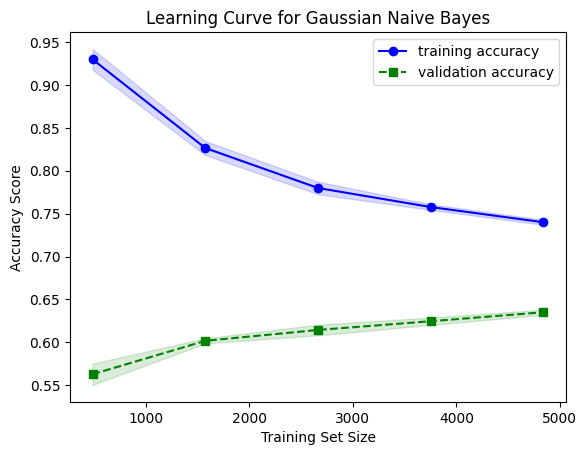

In [ ]:
gauss_grid_learn(X_train3,y_train3,X_val3,y_val3)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'var_smoothing': 1.0}
0.6171530691912324
Accuracy:  0.6266519823788547


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurre

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       339
         1.0       0.63      1.00      0.77       569

    accuracy                           0.63       908
   macro avg       0.31      0.50      0.39       908
weighted avg       0.39      0.63      0.48       908

[learning_curve] Training set sizes: [ 484 1573 2663 3752 4842]


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   53.1s finished


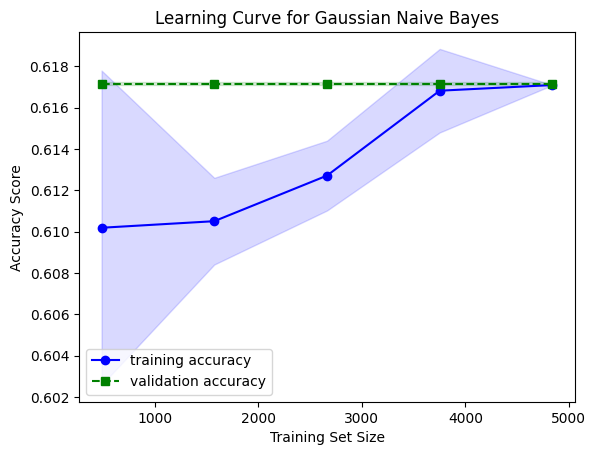

In [ ]:
gauss_grid_learn(X_train4,y_train4,X_val4,y_val4)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'C': 1, 'tol': 10}
0.6504671767688293
Accuracy:  0.6662995594713657
              precision    recall  f1-score   support

         0.0       0.58      0.37      0.45       339
         1.0       0.69      0.84      0.76       569

    accuracy                           0.67       908
   macro avg       0.64      0.61      0.61       908
weighted avg       0.65      0.67      0.65       908

[learning_curve] Training set sizes: [ 484 1573 2663 3752 4842]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  2.9min finished


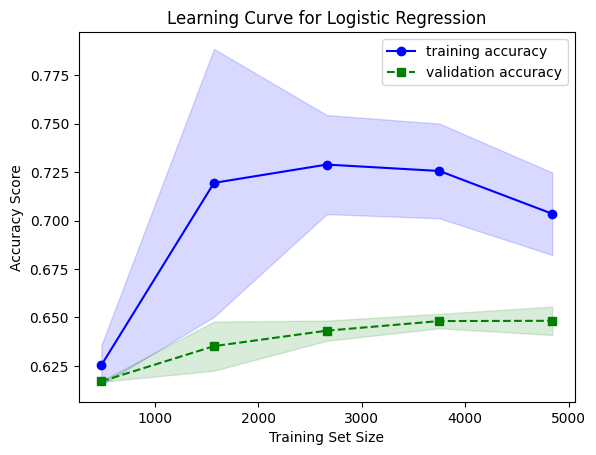

In [ ]:
logistic_grid_learn(X_train3,y_train3,X_val3,y_val3)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
{'C': 0.1, 'tol': 10}
0.651569616393305
Accuracy:  0.6729074889867841
              precision    recall  f1-score   support

         0.0       0.60      0.38      0.46       339
         1.0       0.70      0.85      0.76       569

    accuracy                           0.67       908
   macro avg       0.65      0.61      0.61       908
weighted avg       0.66      0.67      0.65       908

[learning_curve] Training set sizes: [ 484 1573 2663 3752 4842]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.4min finished


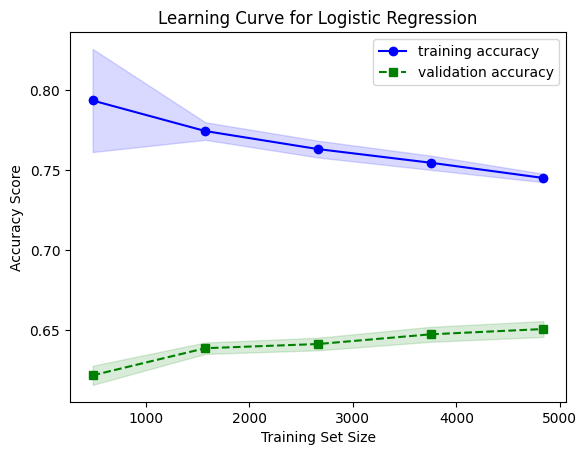

In [ ]:
logistic_grid_learn(X_train4,y_train4,X_val4,y_val4)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'criterion': 'gini', 'max_depth': None}
0.6839209013070672
Accuracy:  0.7037444933920705
              precision    recall  f1-score   support

         0.0       0.68      0.39      0.49       339
         1.0       0.71      0.89      0.79       569

    accuracy                           0.70       908
   macro avg       0.70      0.64      0.64       908
weighted avg       0.70      0.70      0.68       908

[learning_curve] Training set sizes: [ 484 1573 2663 3752 4842]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.9min finished


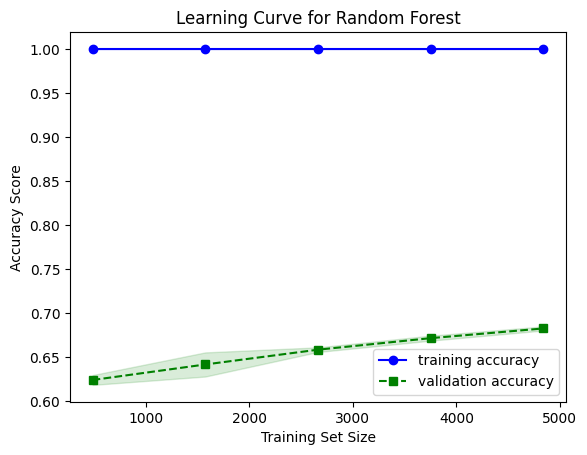

In [ ]:
random_grid_learn(X_train3,y_train3,X_val3,y_val3)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
{'criterion': 'entropy', 'max_depth': 100}
0.6855725995120455
Accuracy:  0.6916299559471366
              precision    recall  f1-score   support

         0.0       0.68      0.32      0.44       339
         1.0       0.69      0.91      0.79       569

    accuracy                           0.69       908
   macro avg       0.69      0.62      0.61       908
weighted avg       0.69      0.69      0.66       908

[learning_curve] Training set sizes: [ 484 1573 2663 3752 4842]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.7min finished


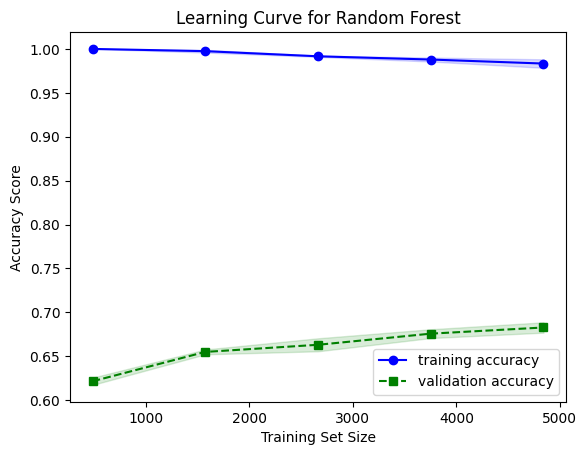

In [ ]:
random_grid_learn(X_train4,y_train4,X_val4,y_val4)

In [ ]:
svm_grid_learn(X_train3,y_train3,X_val3,y_val3)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


In [ ]:
svm_grid_learn(X_train4,y_train4,X_val4,y_val4)